![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Ajuste de curvas

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

### Ajuste por cuadrados mínimos
___

Uno de los problemas que suele tener que resolver una ingeniera o ingeniero es el de armar una función que ajuste datos obtenidos experimentalmente.nEn todos los casos ya vistos, una de las condiciones fundamentales es que los puntos $x_i$ sean distintos. **¿Qué hacemos cuando esto no es así, cuando la cantidad de puntos exceden la capacidad de armar polinomios interpolantes o cuando los puntos que usaremos son aproximaciones de los valores reales?**

Supongamos que tenemos una serie de datos empíricos obtenidos en laboratorio, tales que el conjunto de datos no cumple estrictamente que los $x_i$ sean distintos, con lo cual para un mismo $x_i$ tenemos varios valores de $f(x_i)$. (En realidad suele suceder que aunque los $x_i$ sean distintos, varios $x_j$ sean suficientemente cercanos como para considerarlos iguales.) 

Lo que necesitamos, entonces, es una curva que ajuste lo mejor posible los datos que disponemos, o sea, que el error entre los puntos y esa función de ajuste o aproximación sea el menor posible, sin que la curva pase por los puntos dato.




### Ajuste por cuadrados mínimos
___

Dado que hemos que la función elegida no debe pasar por lo puntos tomados como dato, buscaremos que el error entre los datos $f(x_i)$ y los $g(x_i)$ de la función de ajuste sea el menor posible, plantearemos que $r_i = f(x_i) - g(x_i)$ para $0 ≤ i  ≤ n$, es decir, que el residuo, sea mínimo. Como se trata de un vector, una forma de analizar este caso es mediante la norma de vectores (y matrices) y en este caso la norma al cuadrado, de ahí el nombre de método de los cuadrados mínimos, pues lo que se minimiza es el cuadrado del residuo.

Supongamos que proponemos polinomios como funcióna a aproximar, vemos que el método consiste en resolver un sistema de ecuaciones lineales para obtener los coeficientes del polinimio:

\begin{equation}
y(x)=\sum^m_{k=0}c_k\:x^k=c_0+c_1x+c_2x^2+\ldots+c_m x^m.
\end{equation}

Supongamos que proponemos polinomios como funcióna a aproximar, vemos que el método consiste en resolver un sistema de ecuaciones lineales.

### Ajuste por cuadrados mínimos
___

Supongamos que proponemos polinomios como funcióna a aproximar, vemos que el método consiste en resolver un sistema de ecuaciones lineales.

\begin{equation}
\begin{bmatrix}
n+1 & \displaystyle \sum^n_{i=0}x_i& \ldots& \displaystyle \sum^n_{i=0}x^{m-1}_i & \displaystyle \sum^n_{i=0}x^{m}_i\\
\displaystyle \sum^n_{i=0}x_i &\displaystyle \sum^n_{i=0}x_i^2&\ldots&\displaystyle \sum^n_{i=0}x_i^m  & \displaystyle \sum^n_{i=0}x^{m+1}_i\\
\vdots & \vdots &\ddots &\vdots &\vdots \\
\displaystyle \sum^n_{i=0}x^{m-1}_i &\displaystyle \sum^n_{i=0}x^{m}_i&\ldots &\displaystyle \sum^n_{i=0}x^{2(m-1)}_i  & \displaystyle \sum^n_{i=0}x^{2m-1}_i\\
\displaystyle \sum^n_{i=0}x^m_i &\displaystyle \sum^n_{i=0}x^{m+1}_i&\ldots &\displaystyle \sum^n_{i=0}x^{2m-1}_i  & \displaystyle \sum^n_{i=0}x^{2m}_i
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
\vdots\\
c_{m-1} \\
c_m
\end{bmatrix}=
\begin{bmatrix}
\displaystyle \sum^n_{i=0}f(x_i) \\
\displaystyle \sum^n_{i=0}(f(x_i)\cdot x_i) \\
\vdots \\
\displaystyle \sum^n_{i=0}(f(x_i)\cdot x_i^{m-1}) \\
\displaystyle \sum^n_{i=0}(f(x_i)\cdot x^m_i)
\end{bmatrix}.
\end{equation}

La matriz de coeficientes es similar a una matriz de VanderMonde, matriz que obtuvimos para interpolar una serie de puntos, de ahí que cualquier ajuste de curvas hecho con polinomios resulta ser un problema mal condicionado. Por supuesto, la mala condición de la matriz se hace cada vez más evidente a medida que m sea más grande. Conviene que recordemos que el ajuste polinomial, al igual que la interpolación polinomial son problemas con tendencia a ser mal condicionados.

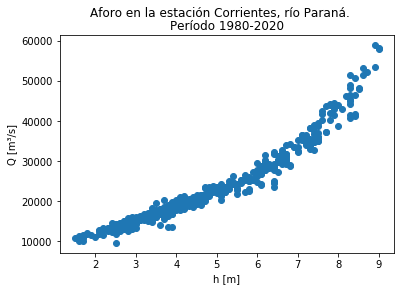

In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos
import matplotlib.pyplot as plt #librería para graficar

#Cargo los datos

datan=pd.read_table('DatosAjuste.csv', sep=',', header=0)
dfn = pd.DataFrame(datan)

plt.scatter(dfn["x"],dfn["y"])
plt.ylabel('Q [m³/s]')
plt.suptitle('Aforo en la estación Corrientes, río Paraná. ')
plt.title('Período 1980-2020')
plt.xlabel('h [m]');

### Ejemplo
___

Propongamos un ajuste de grado $m=3$

Veamos que ocurre cuando evaluamos en un punto y luego como queda la curva de ajuste en comparación a los puntos dato.




In [33]:
def CM(m,df,x):
        A = np.zeros([m+1,m+1])
        B = np.zeros(m+1)  
        n=len(df)
        X=df['x']
        Y=df['y']
        for i in range(0,n):        
            for f in range(0,m+1):
                B[f] += Y[i]*(X[i]**f)            
                for c in range(0,m+1):
                    A[f,c] += X[i]**(f+c)
        # Coeficientes ci
        c = np.linalg.solve(A, B)
        ajuste = 0
        for j in range(0,m+1):
            ajuste += c[j]*(x**j)
        return ajuste,A,B,c 

In [41]:
xp=4   
m=3
ejemplo=CM(m,dfn,xp)
print('Por el método de Cuadrados mínimos obtenemos P(x=',xp,')=',round(ejemplo[0],5),'con ajuste de grado m=',m)
print('La matriz queda: ')
ACM=pd.DataFrame(ejemplo[1])
print(ACM)
print('El vector B: ')
BCM=pd.DataFrame(ejemplo[2])
print(BCM)
print('Resolviendo el SEL obtenemos los coeficientes: ')
cCM=pd.DataFrame(ejemplo[3])
print(cCM);


Por el método de Cuadrados mínimos obtenemos P(x= 4 )= 18645.02598 con ajuste de grado m= 3
La matriz queda: 
           0            1             2             3
0    556.000    2608.0000  1.404234e+04  8.443169e+04
1   2608.000   14042.3400  8.443169e+04  5.504656e+05
2  14042.340   84431.6860  5.504656e+05  3.799603e+06
3  84431.686  550465.6038  3.799603e+06  2.730609e+07
El vector B: 
              0
0  1.267570e+07
1  6.848706e+07
2  4.161842e+08
3  2.751279e+09
Resolviendo el SEL obtenemos los coeficientes: 
             0
0 -1159.905599
1  8944.400961
2 -1566.110195
3   141.954545


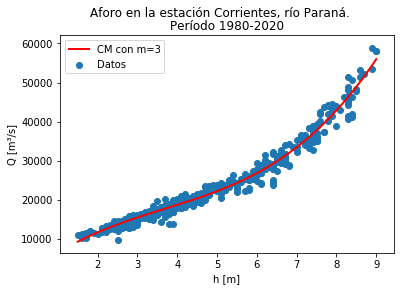

In [32]:
import matplotlib.pyplot as plt

ejex = np.linspace(min(dfn['x']), max(dfn['x']),num=1000)
Nx=len(ejex)
c=ejemplo[3]
y_cm3=np.zeros(Nx,dtype='object')

def ajuste(x):
    return c[0]+c[1]*x+c[2]*(x**2)+c[3]*(x**3)

for i in range(0,Nx):
    y_cm[i] = ajuste(ejex[i])

plt.xlabel('h [m]');
plt.ylabel('Q [m³/s]')
plt.plot(ejex, y_cm, linewidth=2, color = 'red')
plt.scatter(dfn['x'], dfn['y'])
plt.legend(['CM con m=3','Datos'],fontsize=10)
plt.suptitle('Aforo en la estación Corrientes, río Paraná. ')
plt.title('Período 1980-2020');

![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Gracias por su atención
***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*